![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_negation_classifier_demo_biological_texts.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 Class Biological Negation Classifer Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training  data  : 

<br> 

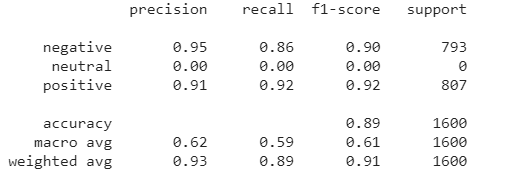


You can achieve these results or even better on this dataset with test  data  : 

<br> 


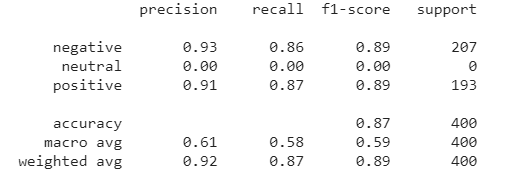










# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install  pyspark==2.4.7 
! pip install nlu > /dev/null    



import nlu

     |████████████████████████████████| 217.9MB 68kB/s 
     |████████████████████████████████| 204kB 20.1MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279465 sha256=c6493b191ba1bbe111dcc8ea7139d8d6e0fdc11c923bc238c3391f08bfa6fb92
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark


# 2. Download   Negation Bilogical Texts dataset 
https://www.kaggle.com/ma7555/bioscope-corpus-negation-annotated
#Context
The BioScope corpus consists of medical and biological texts annotated for negation and their linguistic scope. This was done to allow a comparison between the development of systems for negation/hedge detection and scope resolution.
The corpus is publicly available for research purposes.

You can use this corpus to fine-tune a BERT-like model for negation detection.

This dataset was created in this format during the COVID-19 crisis as a training set for detecting negations regarding treatment of specific drugs in the released research papers.

Creators of the original dataset: MTA-SZTE Research Group on Artificial Intelligence - RGAI
https://rgai.inf.u-szeged.hu/node/105


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/bioscope_abstract.csv


--2021-02-25 08:26:14--  http://ckl-it.de/wp-content/uploads/2021/02/bioscope_abstract.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 802898 (784K) [text/csv]
Saving to: ‘bioscope_abstract.csv’

bioscope_abstract.c 100%[===================>] 784.08K  1.20MB/s    in 0.6s    

2021-02-25 08:26:15 (1.20 MB/s) - ‘bioscope_abstract.csv’ saved [802898/802898]



In [ ]:
import pandas as pd
train_path = '/content/bioscope_abstract.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
train_df = train_df.dropna()
train_df = train_df.sample(frac=1).reset_index(drop=True)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
1529,Recent biochemical and genetic studies indicat...,negative
1230,"Insulin dose-dependently increased the PI-3,4,...",positive
813,It is crucial that these results mirror recent...,negative
473,"In the absence of TCR-mediated activation, Vpr...",positive
1545,We have shown previously that trifluoromethylk...,negative
...,...,...
1027,"However, the C26 element alone, even when repe...",positive
329,Whereas the CRE site was essential in mediatin...,positive
935,"In this study, we demonstrate that constitutiv...",positive
1266,"In contrast, the binding activities of NF1 and...",positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        19
    positive       0.62      1.00      0.77        31

    accuracy                           0.62        50
   macro avg       0.31      0.50      0.38        50
weighted avg       0.38      0.62      0.47        50



,y,text,sentiment,sentiment_confidence,document,default_name_embeddings
origin_index,,,,,,
0,positive,"Interestingly, phase 1 adhesion was inversely ...",positive,0.975958,"Interestingly, phase 1 adhesion was inversely ...","[0.020294584333896637, -0.003580901538953185, ..."
1,positive,"PBL constitutively express c-jun transcripts, ...",positive,0.981556,"PBL constitutively express c-jun transcripts, ...","[0.03842758387327194, 0.004267632961273193, 0...."
2,negative,Erbstatin and genistein inhibited the sIg-cros...,positive,0.973579,Erbstatin and genistein inhibited the sIg-cros...,"[0.04114547371864319, -0.011271283961832523, 0..."
3,negative,Recombinant I kappa B-alpha(MAD-3) inhibited t...,positive,0.963648,Recombinant I kappa B-alpha(MAD-3) inhibited t...,"[-0.008668724447488785, 0.004286200739443302, ..."
4,positive,Using electrophoretic mobility shift analysis ...,positive,0.981299,Using electrophoretic mobility shift analysis ...,"[0.03153171390295029, 0.0300369281321764, 0.01..."
5,positive,Each binding site contributes to the overall a...,positive,0.975567,Each binding site contributes to the overall a...,"[0.026832187548279762, 0.06317257136106491, -0..."
6,positive,In this investigation an enhanced and prolonge...,positive,0.978890,In this investigation an enhanced and prolonge...,"[0.03458377718925476, 0.0585494302213192, 0.03..."
7,positive,The average values from healthy volunteers did...,positive,0.923696,The average values from healthy volunteers did...,"[-0.01714322902262211, 0.021471993997693062, -..."
8,positive,These studies have been extended to show that ...,positive,0.970053,These studies have been extended to show that ...,"[0.022129273042082787, -0.05606718361377716, 0..."


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("The virus had a direct impact on the nervous system")

,sentiment,sentiment_confidence,document,default_name_embeddings
origin_index,,,,
0,positive,0.936225,The virus had a direct impact on the nervous s...,"[0.005800435785204172, 0.025611303746700287, -..."


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(2)                 | Info: Maximum number of epochs to train | Currently set to : 2
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        19
     neutral       0.00      0.00      0.00         0
    positive       0.72      1.00      0.84        31

    accuracy                           0.62        50
   macro avg       0.24      0.33      0.28        50
weighted avg       0.45      0.62      0.52        50



,y,text,sentiment,sentiment_confidence,document,default_name_embeddings
origin_index,,,,,,
0,positive,"Interestingly, phase 1 adhesion was inversely ...",positive,0.858951,"Interestingly, phase 1 adhesion was inversely ...","[0.020294584333896637, -0.003580901538953185, ..."
1,positive,"PBL constitutively express c-jun transcripts, ...",positive,0.900715,"PBL constitutively express c-jun transcripts, ...","[0.03842758387327194, 0.004267632961273193, 0...."
2,negative,Erbstatin and genistein inhibited the sIg-cros...,positive,0.787789,Erbstatin and genistein inhibited the sIg-cros...,"[0.04114547371864319, -0.011271283961832523, 0..."
3,negative,Recombinant I kappa B-alpha(MAD-3) inhibited t...,positive,0.740510,Recombinant I kappa B-alpha(MAD-3) inhibited t...,"[-0.008668724447488785, 0.004286200739443302, ..."
4,positive,Using electrophoretic mobility shift analysis ...,positive,0.865358,Using electrophoretic mobility shift analysis ...,"[0.03153171390295029, 0.0300369281321764, 0.01..."
5,positive,Each binding site contributes to the overall a...,positive,0.885173,Each binding site contributes to the overall a...,"[0.026832187548279762, 0.06317257136106491, -0..."
6,positive,In this investigation an enhanced and prolonge...,positive,0.839118,In this investigation an enhanced and prolonge...,"[0.03458377718925476, 0.0585494302213192, 0.03..."
7,positive,The average values from healthy volunteers did...,positive,0.775531,The average values from healthy volunteers did...,"[-0.01714322902262211, 0.021471993997693062, -..."
8,positive,These studies have been extended to show that ...,positive,0.766982,These studies have been extended to show that ...,"[0.022129273042082787, -0.05606718361377716, 0..."


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(120)  
trainable_pipe['sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.95      0.86      0.90       793
     neutral       0.00      0.00      0.00         0
    positive       0.91      0.92      0.92       807

    accuracy                           0.89      1600
   macro avg       0.62      0.59      0.61      1600
weighted avg       0.93      0.89      0.91      1600



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.93      0.86      0.89       207
     neutral       0.00      0.00      0.00         0
    positive       0.91      0.87      0.89       193

    accuracy                           0.87       400
   macro avg       0.61      0.58      0.59       400
weighted avg       0.92      0.87      0.89       400



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('The virus had a direct impact on the nervous system')
preds

,sentiment_confidence,en_embed_sentence_small_bert_L12_768_embeddings,sentiment,document
origin_index,,,,
0,0.999432,"[0.19975340366363525, 0.40417471528053284, 0.3...",negative,The virus had a direct impact on the nervous s...


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')            | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['regex_tokenizer'] has settable params:
pipe['regex_tokenizer'].setCaseSensitiveExceptions(True)       | Info: Whether to care for case sensitiveness in exceptions | Currently set to : True
pipe['regex_tokenizer'].setTargetPattern('\S+')                | Info: pattern to grab from text as token candidates. Defaults \S+ | Currently set to : \S+
pipe['regex_tokenizer'].setMaxLength(99999)                    | Info: Set the maximum allowed length for each token | Currently set to : 99999
pipe['regex_tokenizer'].setMinLength(0)                        | Info: Set the minimum allowed length for each token | Currently set to : 0
>>> pipe['